In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
expected = 1/10
p1, p2, p3 = 1/30, 1/50, 1/25
q1, q2, q3 = 1-p1, 1-p2, 1-p3
s1, s2, s3 = 30, 50, 25
sigma1, sigma2, sigma3 = np.sqrt(p1*q1/s1), np.sqrt(p2*q2/s2), np.sqrt(p3*q3/s3)

Smaller

In [4]:
proportions_ztest(count=1, nobs=30, value=1/10, alternative='smaller')

(-2.034190510862431, 0.02096619546192645)

In [5]:
norm.sf(expected, p1, sigma1)

0.02096619546192645

Larger

In [6]:
proportions_ztest(count=1, nobs=30, value=1/10, alternative='larger')

(-2.034190510862431, 0.9790338045380735)

In [7]:
norm.cdf(expected, p1, sigma1)

0.9790338045380735

Shape

In [8]:
xs = np.linspace(0,1,500)
ps1 = norm.pdf(xs, p1, sigma1)
ps2 = norm.pdf(xs, p3, sigma3)

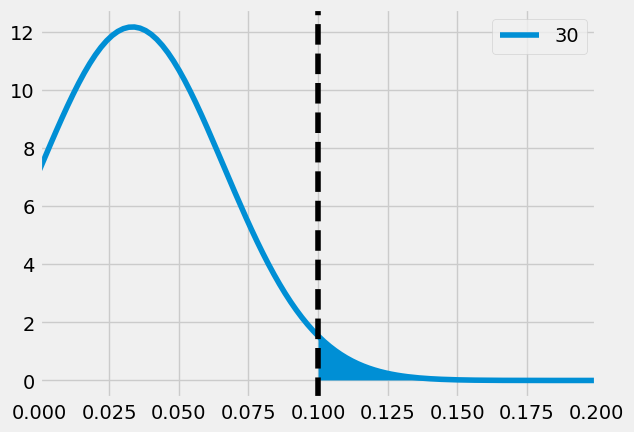

In [9]:
plt.plot(xs, ps1, label=30)
plt.axvline(expected, color='k', ls='--')
plt.xlim(0,0.2)
plt.fill_between(xs, ps1, where=xs>expected)
plt.legend()

Zero

In [10]:
from reliability.Reliability_testing import sample_size_no_failures
sample_size_no_failures(reliability=0.90)

Results from sample_size_no_failures:
To achieve the desired reliability of 0.9 with a 95% lower confidence bound, the required sample size to test is 29 items.

This result is based on a specified weibull shape parameter of 1 and an equivalent test duration of 1 lifetime.
If there are any failures during this test, then the desired lower confidence bound will not be achieved.
If this occurs, use the function Reliability_testing.one_sample_proportion to determine the lower and upper bounds on reliability.


29

In [11]:
norm.cdf(expected, 0, np.sqrt(0.1 * (1-0.1)) / 29)

1.0